In [1]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import OneHotEncoder
#from biopython import Bio.PDB

# Define onehot encoding functions
def onehot_encode_aa(sequence):
    """ Converts string-format amino acid sequence to one-hot encoded format """
    aa_dict = {'A':0,'R':1,'N':2,'D':3,'C':4,'Q':5,'E':6,'G':7,'H':8,'I':9,'L':10,'K':11,'M':12,'F':13,'P':14,'S':15,'T':16,'W':17,'Y':18,'V':19}
    aa_indices = []
    for aa in sequence:
         try:
             #aa_index = Bio.PDB.Polypeptide.one_to_index(aa)
             aa_index = aa_dict[aa]
         except:
             aa_index = 20 # account for non-standard aa
         aa_indices.append(aa_index)
    
    sequence_onehot = np.zeros((len(aa_indices), 21))
    sequence_onehot[np.arange(len(aa_indices)), aa_indices] = 1
    return sequence_onehot

def onehot_encode_ss(sequence):
    """ Converts string-format secondary structure sequence to one-hot encoded format """
    ss_dict = {"E": 0, "T": 1, "H": 2} # through observation, no "-" and "F" in our dataset
    ss_indices = []
    for ss in sequence:
         try:
             ss_index = ss_dict[ss]
         except:
             aa_index = 20 # account for non-standard aa
         ss_indices.append(ss_index)
    
    sequence_onehot = np.zeros((len(ss_indices), len(ss_dict)))
    sequence_onehot[np.arange(len(ss_indices)), ss_indices] = 1
    return sequence_onehot

In [26]:
# Load data 
data1 = pd.read_csv("single_muts_train.csv")
data1 = data1.drop(data1.columns[0], axis=1) # we dont need the first column
data2 = pd.read_csv("multiple_muts_train.csv")
data2 = data2.drop(data2.columns[0], axis=1)

# One hot encode aa and ss sequences
data1.insert(2, "sequence_onehot", data1['sequence'].apply(lambda x: onehot_encode_aa(x)))
data1.insert(4, "secondary_structure_onehot", data1['secondary_structure'].apply(lambda x: onehot_encode_ss(x)))
data2.insert(2, "sequence_onehot", data2['sequence'].apply(lambda x: onehot_encode_aa(x)))
data2.insert(4, "secondary_structure_onehot", data2['secondary_structure'].apply(lambda x: onehot_encode_ss(x)))

# Print example of one hot endocing
print("This is a string-format single-mut protein sequence:")
print(data1["sequence"].iloc[0])
print("\n")
print("This is a one-hot encoded single-mut protein sequence:")
print(data1["sequence_onehot"].iloc[0])
print(data1["secondary_structure_onehot"].iloc[0])
print("\n")
print("This is a string-format multi-muts protein sequence:")
print(data2["sequence"].iloc[0])
print("\n")
print("This is a one-hot encoded multi-muts protein sequence:")
print(data2["sequence_onehot"].iloc[0])
print(data2["secondary_structure_onehot"].iloc[0])

This is a string-format single-mut protein sequence:
GSSTTRYRFTDEEEARRAAKEWARRGYQLHVTQNGTYWEVEVR


This is a one-hot encoded single-mut protein sequence:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [3]:
# There are some data without stability score, removed them.
data2 = data2.dropna(axis=0, how='any')
data1 = data1.dropna(axis=0, how='any')
print(np.where(pd.isnull(data2)))
print(np.where(pd.isnull(data1)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [4]:
# Flatten onehot encodings
data1.insert(3, "sequence_onehot_flat", data1['sequence_onehot'].apply(lambda x: x.flatten()))
data1.insert(6, "secondary_structure_onehot_flat", data1['secondary_structure_onehot'].apply(lambda x: x.flatten()))
data2.insert(3, "sequence_onehot_flat", data2['sequence_onehot'].apply(lambda x: x.flatten()))
data2.insert(6, "secondary_structure_onehot_flat", data2['secondary_structure_onehot'].apply(lambda x: x.flatten()))

In [5]:
# Print example of flat one hot endocing
print("This is a flat one-hot encoded single-mut protein:")
print(data1["sequence"].iloc[0])
print(data1["secondary_structure"].iloc[0])
print("\n")
print(data1["sequence_onehot_flat"].iloc[0])
print(data1["secondary_structure_onehot_flat"].iloc[0])
print("\n")
print("This is a flat one-hot encoded multi-muts protein:")
print(data2["sequence"].iloc[0])
print(data2["secondary_structure"].iloc[0])
print("\n")
print(data2["sequence_onehot_flat"].iloc[0])
print(data2["secondary_structure_onehot_flat"].iloc[0])

This is a flat one-hot encoded single-mut protein:
GSSTTRYRFTDEEEARRAAKEWARRGYQLHVTQNGTYWEVEVR
TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0

In [6]:
len(data1["secondary_structure_onehot_flat"].iloc[0])

129

In [7]:
# Separate the training set to train and validation.
segpoint = lambda seg,dat_size: int(np.ceil(dat_size/3))
data1_segpoint = segpoint(3,data1.shape[0]); data2_segpoint = segpoint(3,data2.shape[0])

data1_val_test = data1[:data1_segpoint]; data1_val_train = data1[data1_segpoint:]
data2_val_test = data2[:data2_segpoint]; data2_val_train = data2[data2_segpoint:]

print(data1_val_test.shape,data1_val_train.shape)
print(data2_val_test.shape,data2_val_train.shape)

(2850, 8) (5700, 8)
(9719, 8) (19437, 8)


In [8]:
#data1_val_test.loc[:,['sequence_onehot','secondary_structure_onehot']]
data1_val_test['sequence_onehot_flat']

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
2845    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2846    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2847    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
2848    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
2849    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
Name: sequence_onehot_flat, Length: 2850, dtype: object

In [9]:
#data1_val_test_input = data1_val_test.loc[:,['sequence_onehot','secondary_structure_onehot']]
data1_val_test_input = data1_val_test['sequence_onehot_flat'].to_numpy()
data1_val_test_label = data1_val_test['stabilityscore'].to_numpy()
#data1_val_train_input = data1_val_train.loc[:,['sequence_onehot','secondary_structure_onehot']]
data1_val_train_input = data1_val_train['sequence_onehot_flat'].to_numpy()
data1_val_train_label = data1_val_train['stabilityscore'].to_numpy()

In [10]:
# This (tr, te) only have sequence one hot, not secondary structure
tr = data1_val_train_input[0]

for i in range(data1_val_train_input.shape[0]-1):
    tr = np.vstack((tr, data1_val_train_input[i+1]))

print(tr.shape)

(5700, 903)


In [12]:
te = data1_val_test_input[0]

for i in range(data1_val_test_input.shape[0]-1):
    te = np.vstack((te, data1_val_test_input[i+1]))

In [13]:
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor(n_estimators=50,bootstrap=True)
clf.fit(tr, data1_val_train_label)

pred=clf.predict(te)

In [14]:
#err=np.mean(pred != data1_val_test_label)
#print("Error rate:",err,"\nAccuracy:",1-err)
print(pred.shape,data1_val_test_label.shape)

(2850,) (2850,)


In [18]:
# MSE
err = 0
for i in range(len(pred)):
    err += (pred[i]-data1_val_test_label[i])**2
print(err/len(pred))

0.05648548284912278


In [20]:
np.corrcoef(pred, data1_val_test_label)

array([[1.        , 0.81466274],
       [0.81466274, 1.        ]])

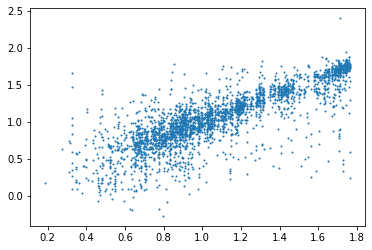

In [24]:
import matplotlib.pyplot as plt

plt.scatter(pred, data1_val_test_label, s=1)

In [34]:
data1_val_train

name                                     sequence  \
2850   HEEH_rd3_0872.pdb_A42V  TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQAIEYLKKVY   
2851        EHEE_0882.pdb_Q1H  GSSHETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT   
2852    HHH_rd3_0138.pdb_R23D  ERRKIEEIAKKLYQSGNPEAARDFLRKAGISEEEIERILQKAG   
2853   HEEH_rd3_0223.pdb_K14R  TIDEIIKALEQAVRDNKPIQVGNYTVTSADEAEKLAKKLKKEY   
2854    HEEH_rd3_0223.pdb_E4P  TIDPIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY   
...                       ...                                          ...   
8545    HHH_rd2_0134.pdb_Y30N  SKDEAQREAERAIRSGNKEEARRILEEAGNSPEQAERIIRKLG   
8546   EHEE_rd2_0005.pdb_W35E  GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYEEVEVR   
8547   HEEH_rd3_0872.pdb_A35T  TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQTIEYLKKAY   
8548  EEHEE_rd3_0037.pdb_E17S  TTIKVNGQEYTVPLSPSQAAKAAKKRWPDYEVQIHGNTVKVTR   
8549   EHEE_rd2_0005.pdb_A12T  GSSTTRYRFTDEEETRRAAKEWARRGYQVHVTQNGTYWEVEVR   

                                        sequence_onehot  \
2850  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2851  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...   
2852  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...   
2853  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2854  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                 ...   
8545  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
8546  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...   
8547  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
8548  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
8549  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...   

                                   sequence_onehot_flat  \
2850  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2851  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
2852  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   
2853  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2854  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                                                 ...   
8545  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8546  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
8547  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8548  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8549  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   

                              secondary_structure  \
2850  THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT   
2851  TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET   
2852  THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT   
2853  THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT   
2854  THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT   
...                                           ...   
8545  THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT   
8546  TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET   
8547  THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT   
8548  TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET   
8549  TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET   

                             secondary_structure_onehot  \
2850  [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...   
2851  [[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, ...   
2852  [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...   
2853  [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...   
2854  [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...   
...                                                 ...   
8545  [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...   
8546  [[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, ...   
8547  [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...   
8548  [[0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...   
8549  [[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, ...   

                        secondary_structure_onehot_flat  stabilityscore  
2850  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...            1.00  
2851  [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...            1.62  
2852  [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...            1.31  
2853  [0.0, 1.0, 0.0, 0.0, 0

In [35]:
data1_val_train.shape[0]

5700

In [36]:
# This have combined sequence and secondary structure
tr_combined = np.hstack((data1_val_train["sequence_onehot"].iloc[0],data1_val_train["secondary_structure_onehot"].iloc[0])).flatten()

for i in range(data1_val_train.shape[0]-1):
    tr_combined = np.vstack((tr_combined, np.hstack((data1_val_train["sequence_onehot"].iloc[i+1],data1_val_train["secondary_structure_onehot"].iloc[i+1])).flatten()))

print(tr_combined.shape)

(5700, 1032)


In [37]:
te_combined = np.hstack((data1_val_test["sequence_onehot"].iloc[0],data1_val_test["secondary_structure_onehot"].iloc[0])).flatten()

for i in range(data1_val_test.shape[0]-1):
    te_combined = np.vstack((te_combined, np.hstack((data1_val_test["sequence_onehot"].iloc[i+1],data1_val_test["secondary_structure_onehot"].iloc[i+1])).flatten()))

print(te_combined.shape)

(2850, 1032)


In [39]:
clf_combined=RandomForestRegressor(n_estimators=50,bootstrap=True)
clf_combined.fit(tr_combined, data1_val_train_label)

pred_combined=clf_combined.predict(te_combined)

In [97]:
'''
err = 0
for i in range(len(pred)):
    err += (pred_combined[i]-data1_val_test_label[i])**2
print(err/len(pred_combined))

print(np.corrcoef(pred_combined, data1_val_test_label))

plt.scatter(pred_combined, data1_val_test_label, s=1)
'''

'\nerr = 0\nfor i in range(len(pred)):\n    err += (pred_combined[i]-data1_val_test_label[i])**2\nprint(err/len(pred_combined))\n\nprint(np.corrcoef(pred_combined, data1_val_test_label))\n\nplt.scatter(pred_combined, data1_val_test_label, s=1)\n'

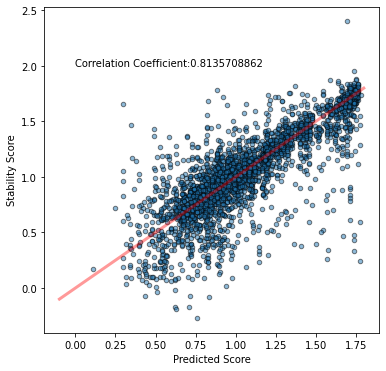

In [96]:
scaplot(pred_combined, data1_val_test_label)

In [42]:
# This (2) is for the multiple mutation
tr2_combined = np.hstack((data2_val_train["sequence_onehot"].iloc[0],data2_val_train["secondary_structure_onehot"].iloc[0])).flatten()

for i in range(data2_val_train.shape[0]-1):
    tr2_combined = np.vstack((tr2_combined, np.hstack((data2_val_train["sequence_onehot"].iloc[i+1],data2_val_train["secondary_structure_onehot"].iloc[i+1])).flatten()))

print(tr2_combined.shape)

(19437, 1032)


In [43]:
te2_combined = np.hstack((data2_val_test["sequence_onehot"].iloc[0],data2_val_test["secondary_structure_onehot"].iloc[0])).flatten()

for i in range(data2_val_test.shape[0]-1):
    te2_combined = np.vstack((te2_combined, np.hstack((data2_val_test["sequence_onehot"].iloc[i+1],data2_val_test["secondary_structure_onehot"].iloc[i+1])).flatten()))

print(te2_combined.shape)

(9719, 1032)


In [45]:
data2_val_train_label = data2_val_train['stabilityscore'].to_numpy()
data2_val_test_label = data2_val_test['stabilityscore'].to_numpy()

In [46]:
clf2_combined=RandomForestRegressor(n_estimators=50,bootstrap=True)
clf2_combined.fit(tr2_combined, data2_val_train_label)

pred2_combined=clf2_combined.predict(te2_combined)

0.05199292517410112
[[1.         0.38268719]
 [0.38268719 1.        ]]


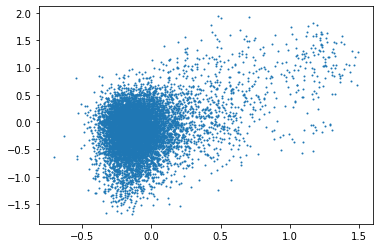

In [47]:
err = 0
for i in range(len(pred)):
    err += (pred2_combined[i]-data2_val_test_label[i])**2
print(err/len(pred2_combined))

print(np.corrcoef(pred2_combined, data2_val_test_label))

plt.scatter(pred2_combined, data2_val_test_label, s=1)

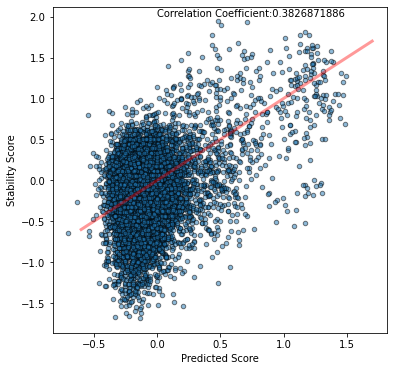

In [84]:
scaplot(pred2_combined, data2_val_test_label)

In [48]:
tr2_onlysec = (data2_val_train["secondary_structure_onehot"].iloc[0]).flatten()

for i in range(data2_val_train.shape[0]-1):
    tr2_onlysec = np.vstack((tr2_onlysec, (data2_val_train["secondary_structure_onehot"].iloc[0]).flatten()))

print(tr2_onlysec.shape)

(19437, 129)


In [49]:
te2_onlysec = (data2_val_test["secondary_structure_onehot"].iloc[0]).flatten()

for i in range(data2_val_test.shape[0]-1):
    te2_onlysec = np.vstack((te2_onlysec, (data2_val_test["secondary_structure_onehot"].iloc[0]).flatten()))

print(te2_onlysec.shape)

(9719, 129)


In [50]:
clf2_onlysec=RandomForestRegressor(n_estimators=50,bootstrap=True)
clf2_onlysec.fit(tr2_onlysec, data2_val_train_label)

pred2_onlysec=clf2_onlysec.predict(te2_onlysec)

0.06306699517522145
[[ 1.00000000e+00 -1.53321841e-17]
 [-1.53321841e-17  1.00000000e+00]]


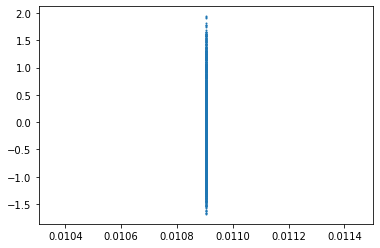

In [51]:
err = 0
for i in range(len(pred)):
    err += (pred2_onlysec[i]-data2_val_test_label[i])**2
print(err/len(pred2_onlysec))

print(np.corrcoef(pred2_onlysec, data2_val_test_label))

plt.scatter(pred2_onlysec, data2_val_test_label, s=1)

In [79]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(hidden_layer_sizes=(200,50,10,1), activation='identity', solver='sgd', max_iter=500, random_state=1, tol=1e-6).fit(tr2_combined, data2_val_train_label)
regr.score(te2_combined, data2_val_test_label)

-0.01230948587775238

In [80]:
pred_neural_combined = regr.predict(te2_combined)

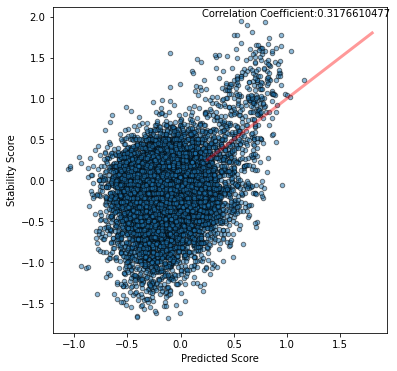

In [117]:
def scaplot(preds,labels):
    plt.rcParams['figure.figsize']=(6, 6)
    plt.scatter(preds,labels,s=20,alpha=0.5,edgecolors="black")
    plt.text(x=0.2,y=2,s="Correlation Coefficient:"+str(round(np.corrcoef(preds, labels)[0,1],10)))
    plt.plot((0.25,1.8),(0.25,1.8),"red",alpha=0.4,linewidth=3)
    #plt.axis("equal")
    plt.ylabel("Stability Score")
    plt.xlabel("Predicted Score")
    plt.show()

scaplot(pred_neural_combined, data2_val_test_label)

D:\Program Files\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


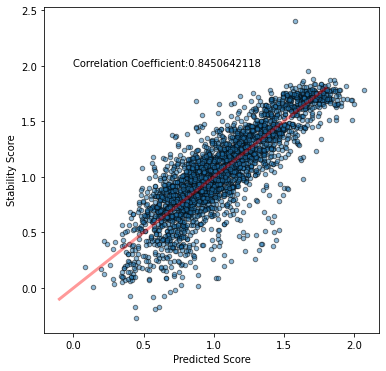

In [98]:
# This again is the single mutation
regr1 = MLPRegressor(hidden_layer_sizes=(200,50,10,1), activation='identity', solver='sgd', max_iter=500, random_state=1, tol=1e-6).fit(tr_combined, data1_val_train_label)

pred_neural1_combined = regr1.predict(te_combined)
scaplot(pred_neural1_combined, data1_val_test_label)

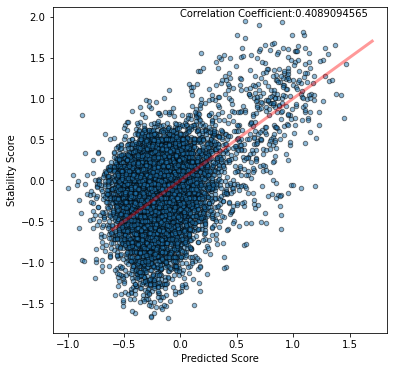

In [89]:
# multiple
from sklearn.svm import SVR #very slow
svmreg = SVR().fit(tr2_combined, data2_val_train_label)
pred_svm_combined = svmreg.predict(te2_combined)
scaplot(pred_svm_combined, data2_val_test_label)

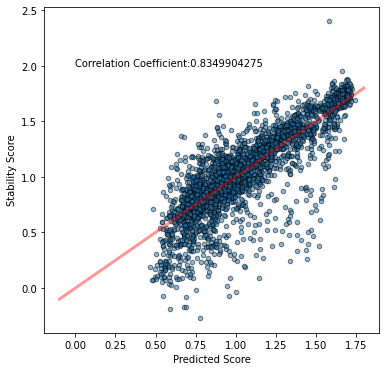

In [99]:
# single
svmreg1 = SVR().fit(tr_combined, data1_val_train_label)
pred_svm1_combined = svmreg1.predict(te_combined)

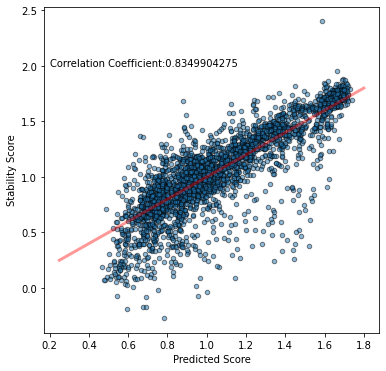

In [118]:
scaplot(pred_svm1_combined, data1_val_test_label)

In [119]:
# trying PCA, but not finish
from sklearn.decomposition import PCA

pca = PCA(); pca.fit(tr2_combined)
#define pca class and fit the data
tr2_combined_pca = pca.transform(tr2_combined)
#pca transformation
print(tr2_combined_pca.shape)

(19437, 1032)


In [130]:
pcate = PCA(); pcate.fit(te2_combined)
#define pca class and fit the data
te2_combined_pca = pcate.transform(te2_combined)
#pca transformation

In [136]:
print(tr2_combined_pca[:,:2])
print(te2_combined_pca[:,:2])

[[-2.14757108  4.7586067 ]
 [-3.74401106 -1.53661288]
 [-3.77253156 -1.34238159]
 ...
 [ 5.10982675 -0.4693434 ]
 [-2.29621572  4.92652029]
 [-4.46742431 -2.31081058]]
[[-3.29798258  4.30891725]
 [-3.05032595  3.57780829]
 [ 4.58817648  0.56930159]
 ...
 [ 2.84601661 -1.21644014]
 [-3.09362345  3.61739504]
 [-3.72478313 -2.69758716]]
